### Hotel Booking Demand Dataset

#### Description
The Hotel Booking Demand dataset contains information about hotel bookings made through a certain platform. The dataset aims to analyze the factors influencing hotel bookings and to predict booking demand. It includes a variety of features that provide insights into the booking process, customer preferences, and hotel characteristics.

#### Key Features
- *hotel*: Type of hotel (e.g., Resort Hotel, City Hotel).
- *is_canceled*: Indicates whether the booking was canceled (1 = canceled, 0 = not canceled).
- *lead_time*: The number of days between the booking date and the arrival date.
- *arrival_date_year*: Year of arrival.
- *arrival_date_month*: Month of arrival.
- *arrival_date_week_number*: Week number of the year for the arrival date.
- *arrival_date_day_of_month*: Day of the month for the arrival date.
- *stays_in_weekend_nights*: Number of weekend nights (Saturday and Sunday) the customer stayed.
- *stays_in_week_nights*: Number of week nights (Monday to Friday) the customer stayed.
- *adults*: Number of adults in the booking.
- *children*: Number of children in the booking.
- *babies*: Number of babies in the booking.
- *meal*: Meal plan selected (e.g., Bed & Breakfast, Half Board).
- *country*: Country of origin of the guest.
- *market_segment*: Market segment designation (e.g., Online Travel Agent, Direct).
- *distribution_channel*: The channel through which the booking was made (e.g., Direct, Corporate).
- *is_repeated_guest*: Indicates if the booking is from a repeated guest (1 = yes, 0 = no).
- *previous_cancellations*: Number of previous bookings that were canceled by the guest.
- *previous_bookings_not_canceled*: Number of previous bookings that were not canceled.
- *reserved_room_type*: Type of room reserved (e.g., A, B, C, D).
- *assigned_room_type*: Type of room assigned to the guest.
- *booking_changes*: Number of changes made to the booking.
- *deposit_type*: Type of deposit (e.g., No Deposit, Refundable, Non Refund).
- *agent*: ID of the travel agent who made the booking.
- *company*: ID of the company that made the booking (if applicable).
- *days_in_waiting_list*: Number of days the booking was in the waiting list before confirmation.
- *customer_type*: Type of customer (e.g., Contract, Group, Transient).
- *adr*: Average Daily Rate (price per night).
- *required_car_parking_spaces*: Number of parking spaces required.
- *total_of_special_requests*: Total number of special requests made by the guest.

#### Target Variable
- *is_canceled*: This is the primary target variable for predictive modeling. It indicates whether a booking was canceled (1) or not (0). The goal is to predict booking cancellations based on the various features available in the dataset.

#### Use Cases
- Analyzing factors affecting booking cancellations.
- Developing dynamic pricing models based on booking demand.
- Improving marketing strategies for hotels by understanding customer preferences.

If you need further assistance with analysis or modeling using this dataset, let me know!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [5]:
df[df.is_canceled == 1].reservation_status.value_counts()

reservation_status
Canceled    43017
No-Show      1207
Name: count, dtype: int64

In [6]:
df.reservation_status.value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [7]:
df.shape

(119390, 32)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [13]:
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [14]:
a=df.copy()

In [15]:
a

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
a[a.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [17]:
a.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [18]:
a.shape

(119390, 32)

In [19]:
a.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
a.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
a.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
a.drop(['company','agent'], axis=1,inplace=True)



In [23]:
a

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [24]:
a.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [25]:

a.dropna(inplace=True)

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

In [27]:
a['adr'].describe()

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [28]:
a.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,1461


In [29]:
for col in a.describe(include ='object').columns:
    print(col)
    print(a[col].unique())
    print(a[col].nunique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
2
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
12
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
5
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV'

<Axes: ylabel='adr'>

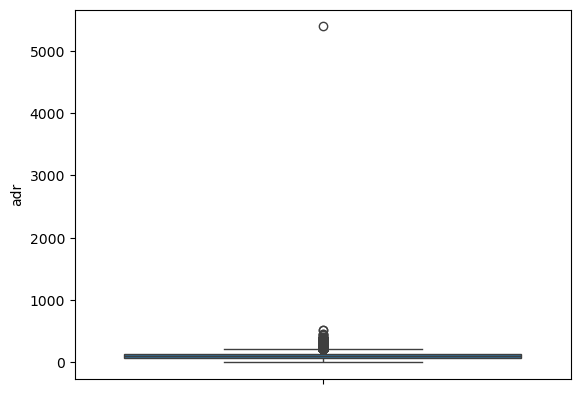

In [30]:
sns.boxplot(a.adr)

In [31]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [32]:
wisker(a['adr'])

(-14.0, 210.0)

In [33]:
a[a['adr']<5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [34]:
a['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64

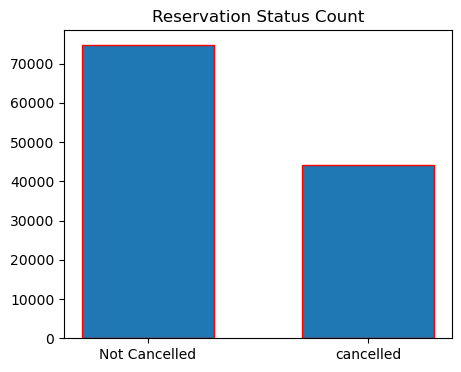

In [35]:
#percentage of cancelled and not cancelled values
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','cancelled'],a['is_canceled'].value_counts(), edgecolor='r',width=0.6)
plt.show()

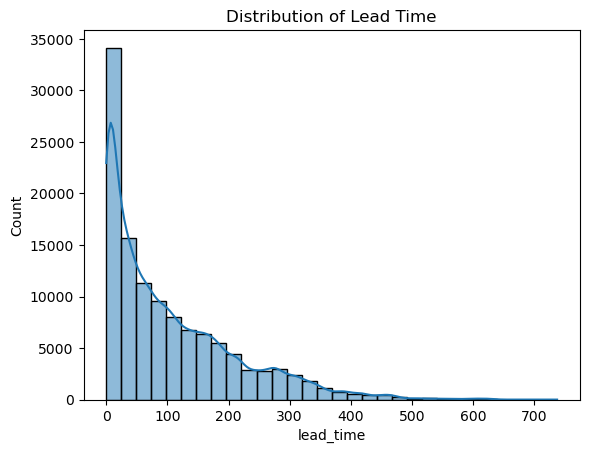

In [36]:
#Univariate Analysis
#Histograms and Density Plots: Analyze distributions of numerical features such as lead_time, number_of_nights
sns.histplot(a['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.show()

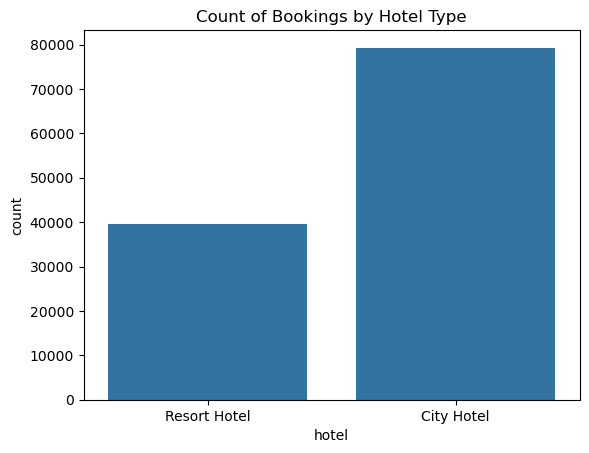

In [37]:
sns.countplot(data=a, x='hotel')
plt.title('Count of Bookings by Hotel Type')
plt.show()

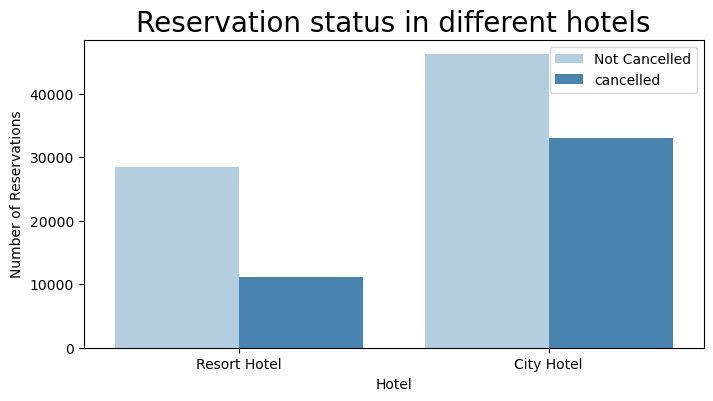

In [38]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x ='hotel', hue ='is_canceled', data =a, palette='Blues')
lengend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled','cancelled'])
plt.show()

# Calculate the cancellation count for each hotel

In [40]:
resort_hotel = a[a['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [41]:
city_hotel = a[a['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.582911
1    0.417089
Name: proportion, dtype: float64

In [42]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
print(resort_hotel)
print(city_hotel)

                                adr
reservation_status_date            
2014-11-18                 0.000000
2015-01-01                61.966667
2015-01-02                 9.633750
2015-01-18                 0.000000
2015-01-21                37.301209
...                             ...
2017-09-08               101.012500
2017-09-09               147.778333
2017-09-10               145.272500
2017-09-12               153.570000
2017-09-14               105.930000

[913 rows x 1 columns]
                                adr
reservation_status_date            
2014-10-17                62.800000
2015-01-01                62.063158
2015-01-20                76.500000
2015-01-30                61.400000
2015-02-17                76.500000
...                             ...
2017-09-03               137.172600
2017-09-04               116.925385
2017-09-05               154.000000
2017-09-06                93.293333
2017-09-07               159.685000

[864 rows x 1 columns]


In [43]:
average_adr = a.groupby('hotel')['adr'].mean().reset_index()
print(average_adr)

          hotel         adr
0    City Hotel  105.326470
1  Resort Hotel   95.347555


In [44]:
average_adr.columns = ['Hotel Type', 'Average Daily Rate']

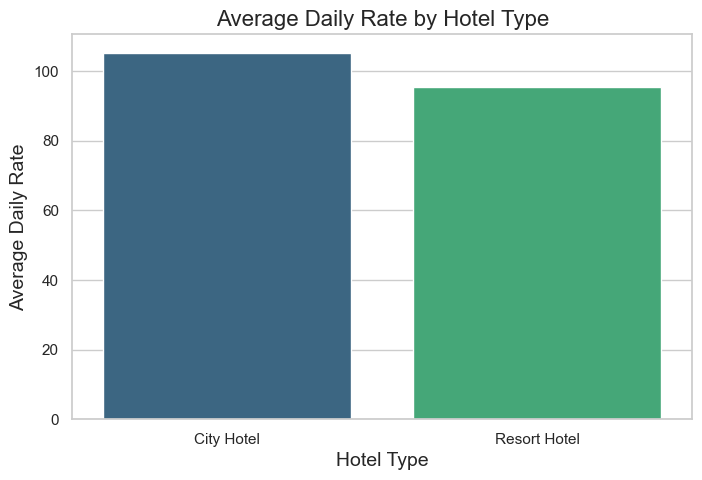

In [45]:
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=average_adr, x='Hotel Type', y='Average Daily Rate', palette='viridis')

# Add titles and labels
plt.title('Average Daily Rate by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)

# Show the plot
plt.show()

In [46]:

#Create a stacked bar plot to show the distribution of reservation statuses per yea
a['reservation_status_date'] = pd.to_datetime(a['reservation_status_date'])



In [47]:
# Extract year from the date
a['year'] = a['reservation_status_date'].dt.year



In [48]:
# Group by year and reservation status, counting occurrences
reservation_counts = a.groupby(['year', 'reservation_status']).size().reset_index(name='count')

print(reservation_counts)

   year reservation_status  count
0  2014           Canceled    181
1  2015           Canceled  11243
2  2015          Check-Out  13362
3  2015            No-Show    188
4  2016           Canceled  20737
5  2016          Check-Out  36125
6  2016            No-Show    667
7  2017           Canceled  10789
8  2017          Check-Out  25258
9  2017            No-Show    348


In [49]:
pivot_table = reservation_counts.pivot(index='year', columns='reservation_status', values='count').fillna(0)


In [50]:
pivot_table

reservation_status,Canceled,Check-Out,No-Show
year,,,
2014,181.0,0.0,0.0
2015,11243.0,13362.0,188.0
2016,20737.0,36125.0,667.0
2017,10789.0,25258.0,348.0


<Figure size 1200x600 with 0 Axes>

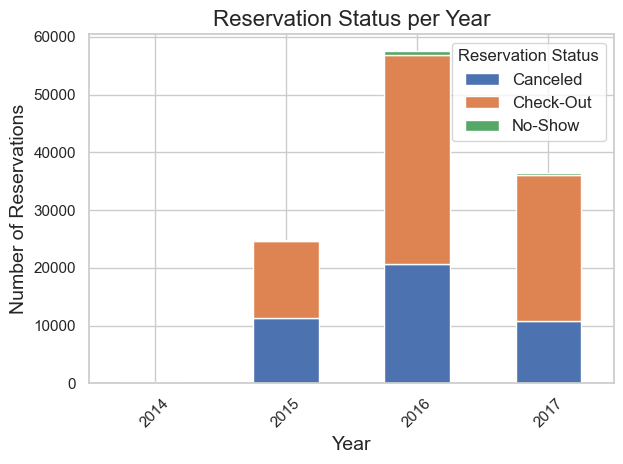

In [51]:
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Reservation Status per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Reservation Status', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

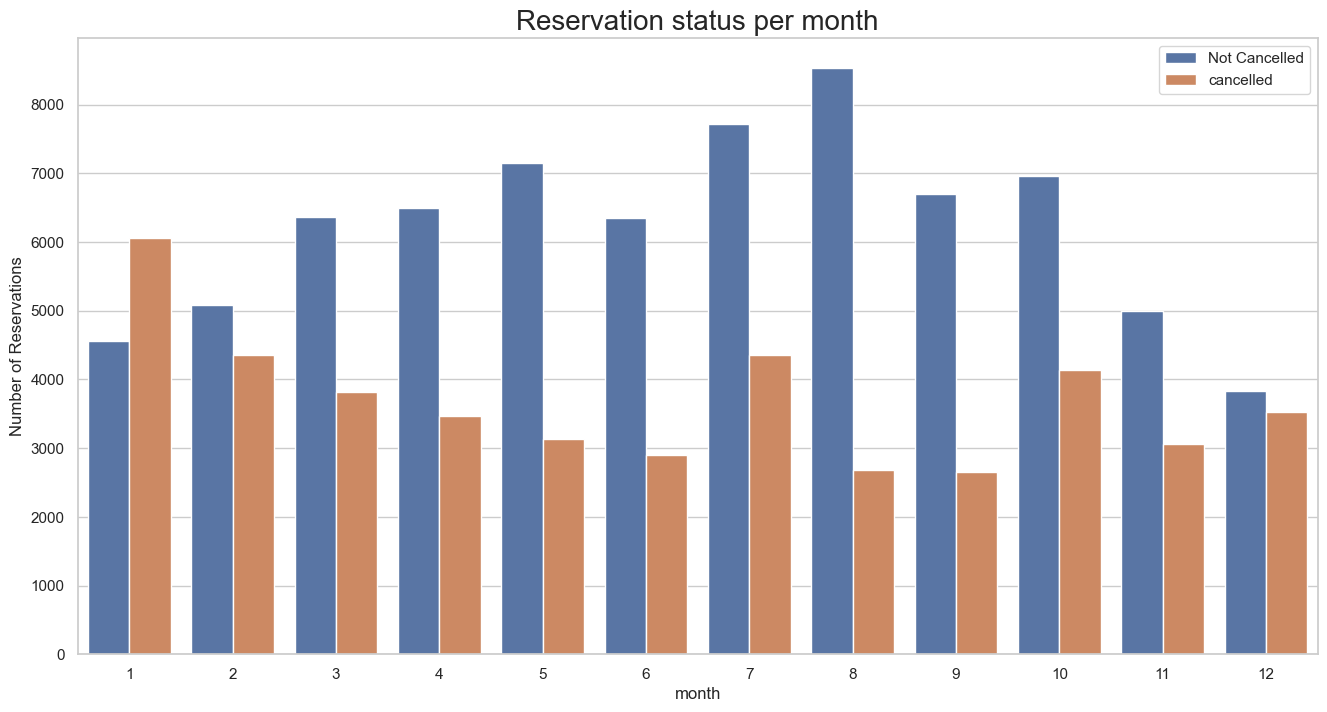

In [52]:
a['month'] = a['reservation_status_date'].dt.month
plt.figure(figsize =(16,8))
ax1 = sns.countplot( x = 'month', hue='is_canceled', data=a)
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled','cancelled'])
plt.show()

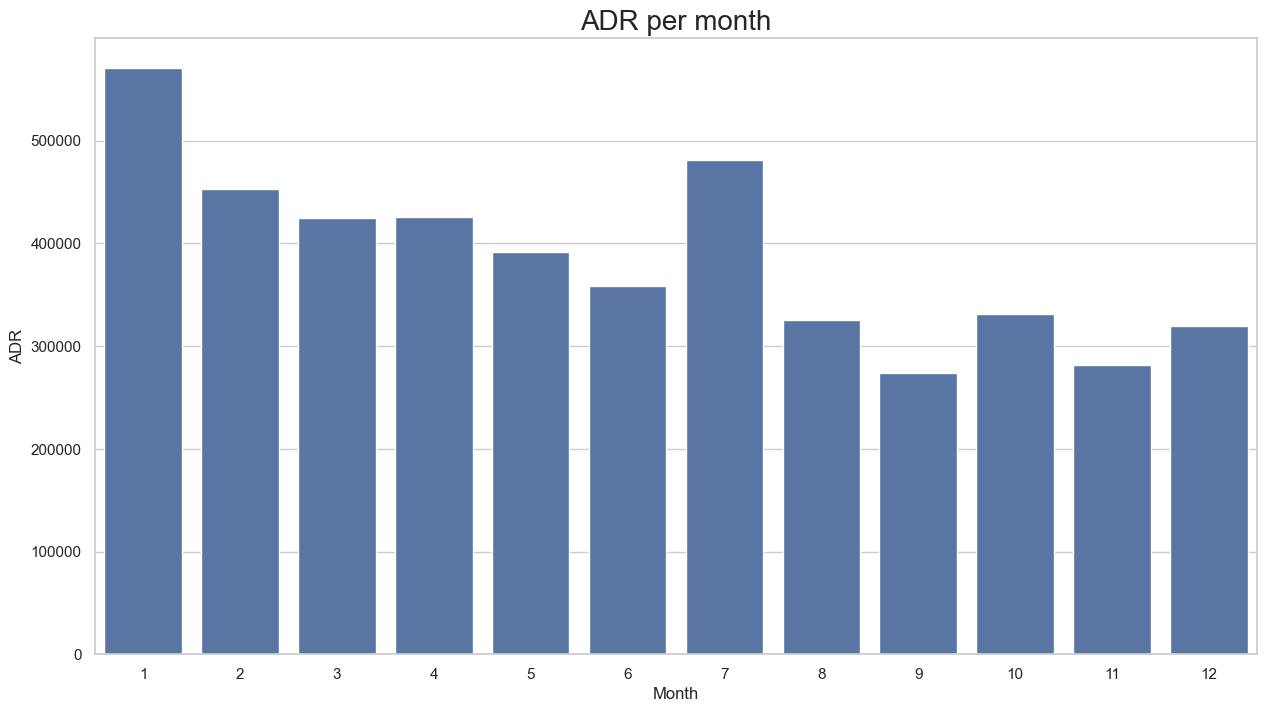

In [53]:
adr_per_month = a[a['is_canceled']==1].groupby('month')['adr'].sum().reset_index()

plt.figure(figsize =(15,8))
plt.title('ADR per month', fontsize = 20)
sns.barplot(data=adr_per_month, x='month', y='adr')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

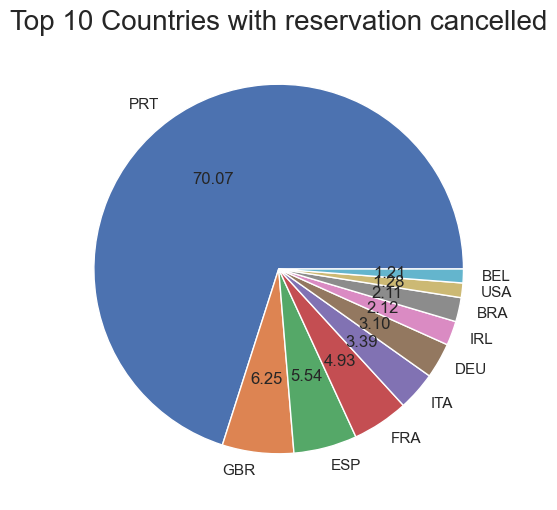

In [54]:
cancelled_data = a[a['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize =(8,6))
plt.title('Top 10 Countries with reservation cancelled', fontsize = 20)
plt.pie(top_10_country, autopct='%.2f', labels =top_10_country.index)
plt.show()

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

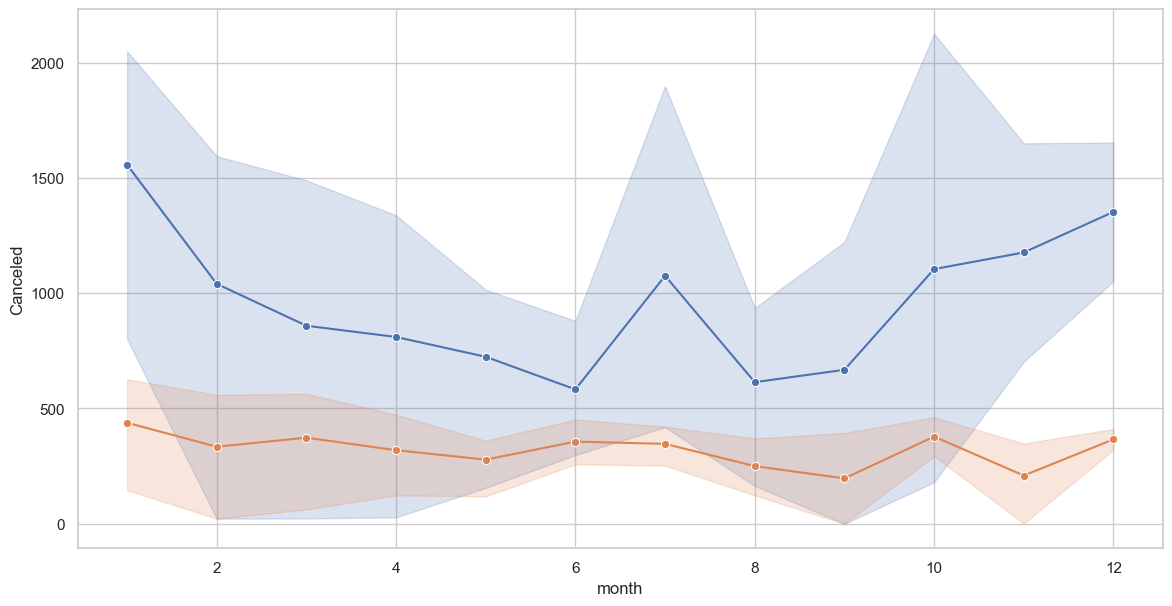

In [55]:
a['reservation_status_date'] = pd.to_datetime(a['reservation_status_date'])

# Extract month and year from the date
a['month'] = a['reservation_status_date'].dt.month
a['year'] = a['reservation_status_date'].dt.year

# Group by year, month, and hotel type, counting occurrences of each reservation status
reservation_counts = a.groupby(['year', 'month', 'hotel', 'reservation_status']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_table = reservation_counts.pivot_table(index=['year', 'month', 'hotel'], columns='reservation_status', values='count', fill_value=0)

# Reset the index to make it easier to plot
pivot_table = pivot_table.reset_index()

# Set the style of Seaborn
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=pivot_table, x='month', y='Canceled', hue='hotel', marker='o', label='Canceled')
sns.lineplot(data=pivot_table, x='month', y='Checked-Out', hue='hotel', marker='o', label='Checked-Out')

# Add titles and labels
plt.title('Reservation Status per Month Based on Hotels', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Hotel Type', fontsize=12)
plt.grid()

# Show the plot
plt.tight_layout()

In [ ]:
a['reservation_status_date'] = pd.to_datetime(a['reservation_status_date'])

# Extract month and year from the date
a['month'] = a['reservation_status_date'].dt.month
a['year'] = a['reservation_status_date'].dt.year

# Group by year, month, and hotel type, counting occurrences of each reservation status
reservation_counts = a.groupby(['year', 'month', 'hotel', 'reservation_status']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_table = reservation_counts.pivot_table(index=['year', 'month', 'hotel'], columns='reservation_status', values='count', fill_value=0)

# Reset the index to make it easier to plot
pivot_table = pivot_table.reset_index()

# Set the style of Seaborn
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(600, 7))
pivot_table.set_index(['year', 'month', 'hotel'])[['Canceled', 'Check-Out']].unstack().plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Reservation Status per Month Based on Hotels', fontsize=16)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Reservation Status', fontsize=12)

# Show the plot
plt.tight_layout()

In [ ]:
sns.set(style='whitegrid')

# Create a FacetGrid
g = sns.FacetGrid(reservation_counts, col='hotel', hue='reservation_status', height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='month', y='count', palette='viridis')
g.add_legend()

# Add titles and labels
g.set_axis_labels('Month', 'Number of Reservations')
g.set_titles(col_template="{col_name}")

# Adjust ticks for the x-axis

g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


In [ ]:
a.describe()

In [ ]:
a.dtypes

In [ ]:
sns.boxplot(data=a, x='hotel', y='adr')  # adr = average daily rate
plt.title('Average Daily Rate by Hotel Type')
plt.show()

In [ ]:
a['year'] = a['reservation_status_date'].dt.year
bookings_per_year = a['year'].value_counts().sort_index()

plt.plot(bookings_per_year.index, bookings_per_year.values)
plt.title('Total Bookings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(columns=['is_canceled'])


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = df['is_canceled']

In [ ]:
columns_to_drop = ['agent','company']  # Adjust based on relevance
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.shape

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
y_pred = model.predict(X_test)

columns_to_drop = ['hotel', 'reservation_status', 'reservation_status_date']  # Adjust based on relevance
df.drop(columns=columns_to_drop, inplace=True)

# Define the dependent variable
y = df['is_canceled']  # The target variable

# Define the independent variables
X = df.drop(columns=['is_canceled'])

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
importances = model.feature_importances_
feature_names = X.columns



In [ ]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

In [1]:
#training model without resevation_status column

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure xgboost is installed

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your actual file path

# Fill missing values
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop non-essential columns
df.drop(columns=['agent', 'company', 'reservation_status', 'reservation_status_date'], inplace=True)

# One-hot encode categorical variables
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 
                    'market_segment', 'distribution_channel', 
                    'customer_type', 'reserved_room_type', 
                    'assigned_room_type', 'deposit_type']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = df.drop(columns=['is_canceled'])  # Features
y = df['is_canceled']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} Results:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")
